In [1]:
from platform import python_version

print(python_version())

3.11.7


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import math
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [9]:
stock_df = pd.read_csv('Desktop/data_set.csv')

In [10]:
stock_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [11]:
stock_df.shape

(1009, 7)

In [12]:
stock_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [13]:
stock_df.describe(include = 'all')

,Date,Open,High,Low,Close,Adj Close,Volume
count,1009,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
unique,1009,NaN,NaN,NaN,NaN,NaN,NaN
top,2018-02-05,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,NaN,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,NaN,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,NaN,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,NaN,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,NaN,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06


In [14]:
stock_df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [15]:
stock_df.isna()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1004,False,False,False,False,False,False,False
1005,False,False,False,False,False,False,False
1006,False,False,False,False,False,False,False
1007,False,False,False,False,False,False,False


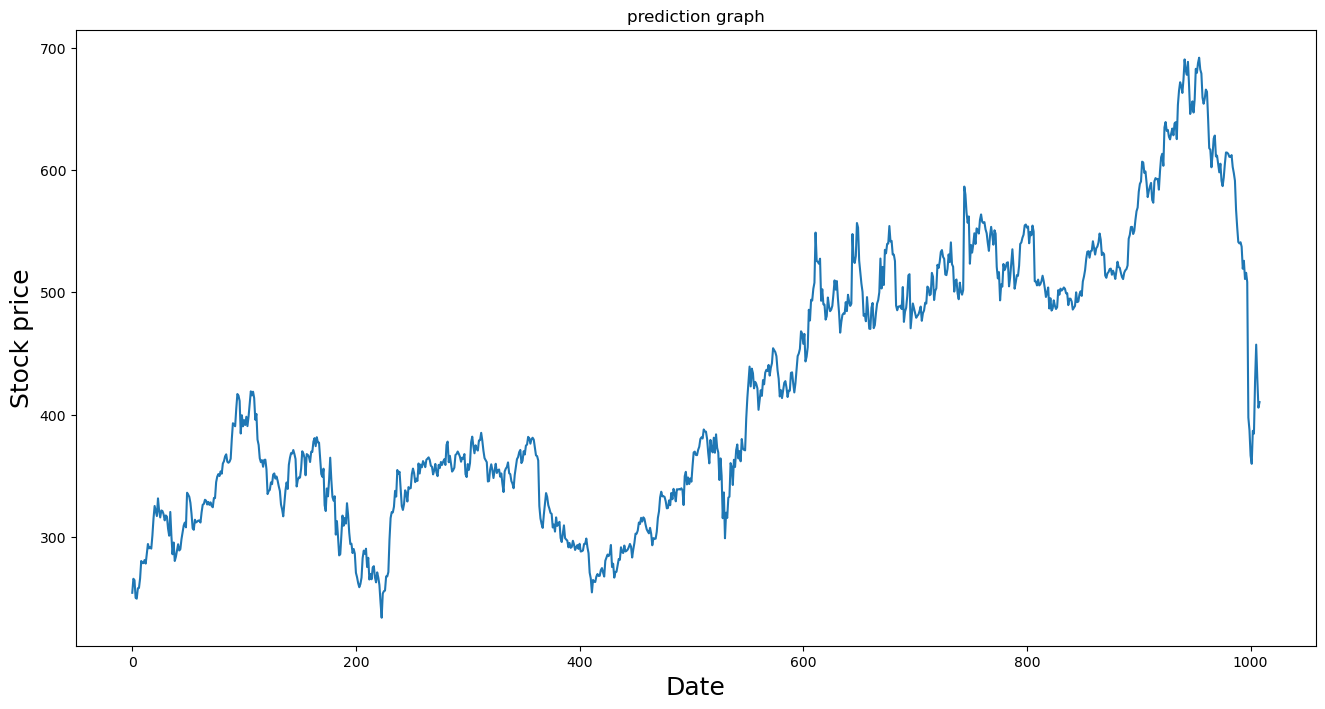

In [18]:
#Visualisibng the data
plt.figure(figsize=(16,8))
plt.title('prediction graph')
plt.plot(stock_df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Stock price', fontsize=18)
plt.show()


In [25]:
data=stock_df.filter(['Close'])
dataset=data.values
training_data_len = math.ceil(len(dataset) * .8 )
print(training_data_len)

808


In [29]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

print(scaled_data)

[[0.04451626]
 [0.06954849]
 [0.06701469]
 ...
 [0.4272515 ]
 [0.37509011]
 [0.38507243]]


In [34]:
train_data = scaled_data[0:training_data_len,:]
x_train=[]
y_train=[]

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.04451626, 0.06954849, 0.06701469, 0.03542955, 0.03405342,
       0.05257641, 0.05327534, 0.0701601 , 0.10133021, 0.09750767,
       0.09757319, 0.10301218, 0.09667768, 0.11369343, 0.13167034,
       0.12391599, 0.12559796, 0.12343551, 0.14672022, 0.1771914 ,
       0.19951508, 0.19064677, 0.18156003, 0.2131015 , 0.19095254,
       0.17911361, 0.19149862, 0.19049385, 0.18472731, 0.17387127,
       0.18265218, 0.18042421, 0.15906164, 0.14647998, 0.18887749,
       0.1459339 , 0.11334393, 0.13426968, 0.10137394, 0.10875693,
       0.12026823, 0.13125532, 0.12007165, 0.12243068, 0.14021101,
       0.15244317, 0.16463161, 0.16987394, 0.16142066, 0.22319301,
       0.21982915, 0.21585376, 0.20508505, 0.18525152, 0.15976057,
       0.15700838, 0.17496343, 0.17011425, 0.17164323, 0.17347804])]
[0.17360909661393864]

[array([0.04451626, 0.06954849, 0.06701469, 0.03542955, 0.03405342,
       0.05257641, 0.05327534, 0.0701601 , 0.10133021, 0.09750767,
       0.09757319, 0.10301218, 0.09

In [35]:
x_train,y_train = np.array(x_train),np.array(y_train)

In [36]:
x_train = np.reshape(x_train, (x_train.shape[0] , x_train.shape[1],1))
x_train.shape

(748, 60, 1)

In [57]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [58]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [60]:
#training the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

748/748 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - loss: 0.0076


In [62]:
#creating the testing data , new array containing scaldd values from random indexx 
test_data =scaled_data[training_data_len - 60: , :]
x_test=[]
y_test=dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [63]:
x_test=np.array(x_test)

In [66]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [67]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


In [68]:
rmse= np.sqrt(np.mean(predictions - y_test)**2 )
rmse

6.970503340485073

C:\Users\Hp\AppData\Local\Temp\ipykernel_25768\995329741.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']= predictions


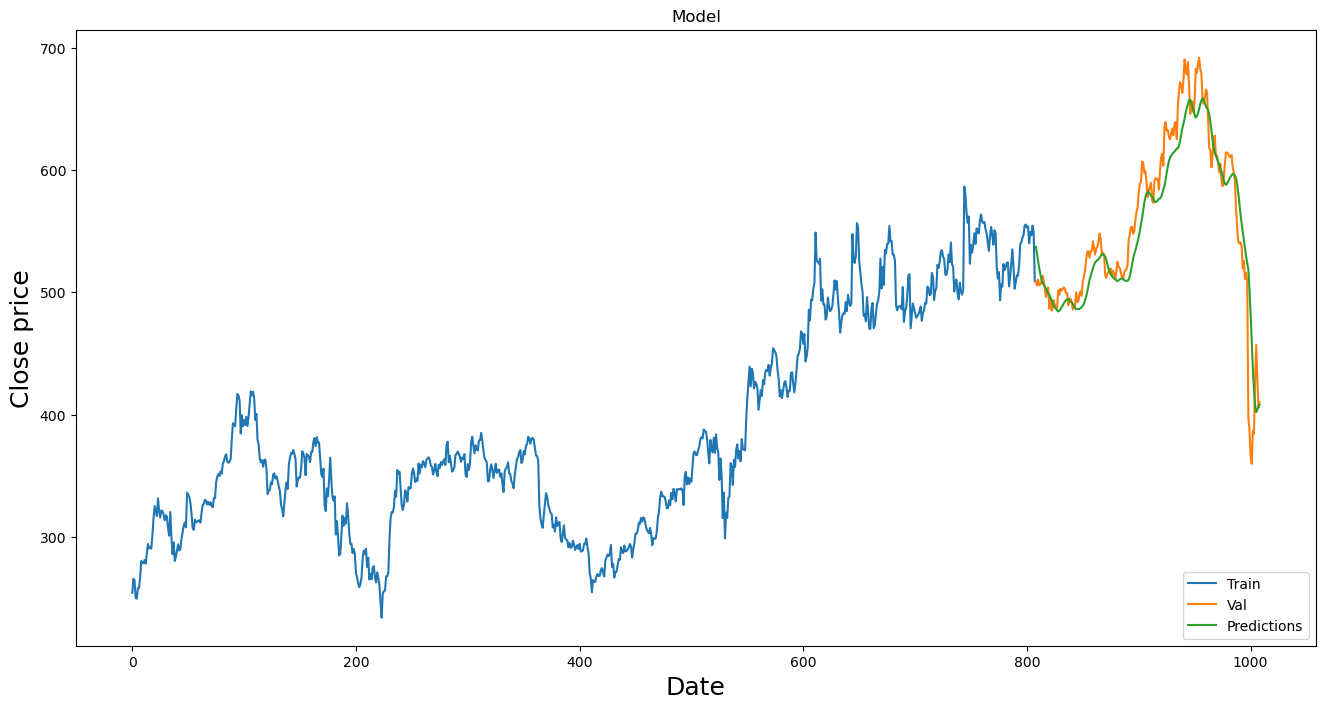

In [72]:
#plotting the data
train= data[:training_data_len]
valid= data[training_data_len:]
valid['Predictions']= predictions
#visualizing
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc="lower right")
plt.show()

In [73]:
#display valid and predicted prices
valid

,Close,Predictions
808,508.779999,537.098572
809,505.549988,531.496887
810,510.299988,525.249695
811,505.549988,519.781982
812,506.519989,514.747314
...,...,...
1004,427.140015,407.653046
1005,457.130005,401.964722
1006,429.480011,403.822784
1007,405.600006,406.871338
